In [1]:
# Swing Trading Strategies

[*********************100%%**********************]  1 of 1 completed


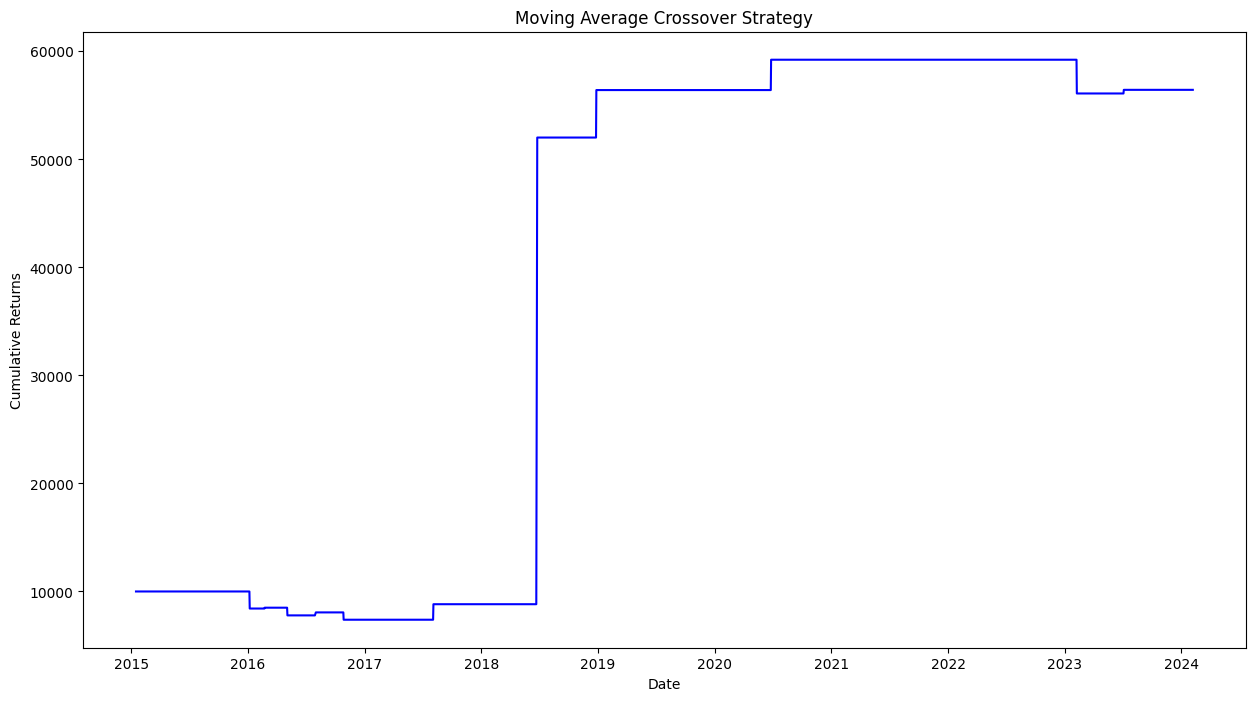

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt


# Download historical data from Yahoo Finance
ticker = 'FCL.NS'
data = yf.download(ticker, start='2010-01-01', end='2024-02-07')

# Define short-term and long-term moving averages
short_ma = 50
long_ma = 200

# Calculate moving averages
data['short_ma'] = data['Close'].rolling(short_ma).mean()
data['long_ma'] = data['Close'].rolling(long_ma).mean()

# Create a new column to signal buy/sell orders
data['Signal'] = np.where(data['short_ma'] > data['long_ma'], 1, 0)
data['Position'] = data['Signal'].diff()

# Set up initial capital and position size
capital = 10000
position_size = capital / len(data)

# Calculate daily returns
data['Returns'] = data['Close'].pct_change()

# Calculate strategy returns
data['Strategy_Returns'] = data['Position'] * data['Returns'] * position_size

# Calculate cumulative returns
data['Cumulative_Returns'] = (1 + data['Strategy_Returns']).cumprod() * capital

# Plot cumulative returns
# data['Cumulative_Returns'].plot(figsize=(10, 6), title='Moving Average Crossover Strategy', colour = 'r')

plt.figure(figsize=(15,8))
plt.plot(data['Cumulative_Returns'], 'b')
plt.title('Moving Average Crossover Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()


## Fibonacci Retracement: This strategy involves using Fibonacci levels to identify potential areas of support and resistance. Traders can buy at support levels and sell at resistance levels.

[*********************100%%**********************]  1 of 1 completed


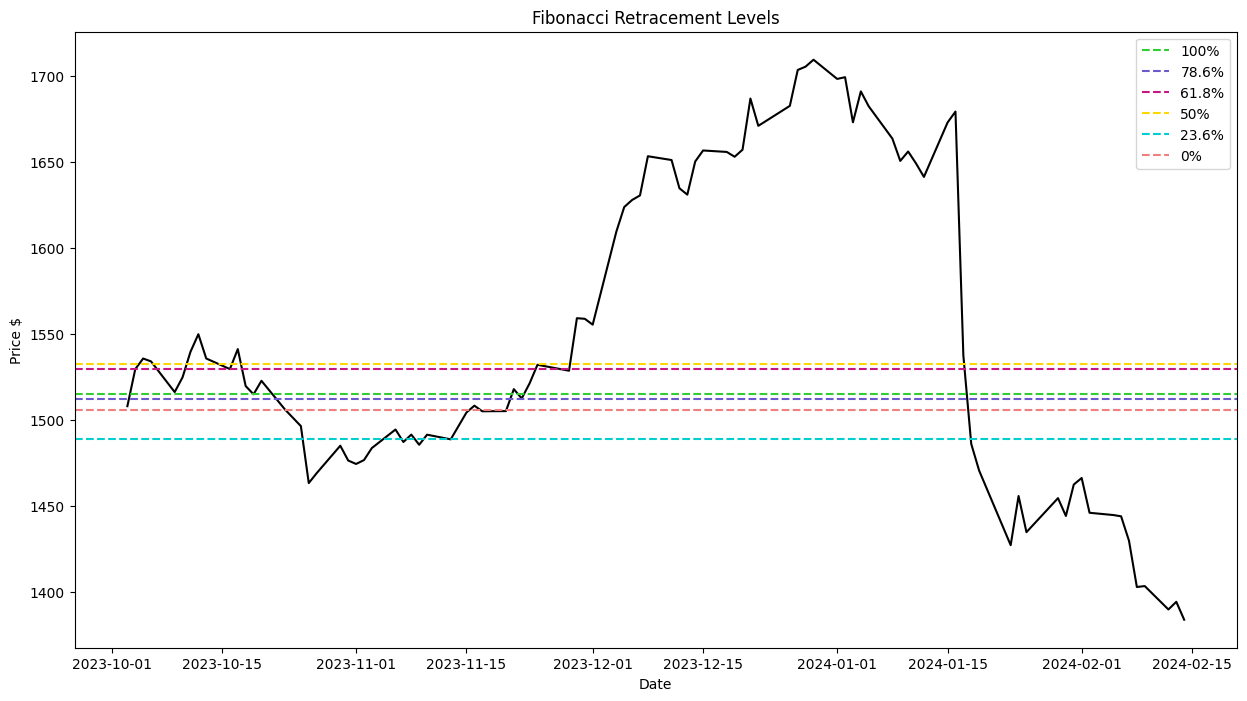

In [10]:
# Fibonacci Retracement Levels
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Download historical data from Yahoo Finance
ticker = 'HDFCBANK.NS'
data = yf.download(ticker, start='2023-10-01', end='2024-02-15')

# Calculate the high, low, and close prices
high = data['High']
low = data['Low']
close = data['Close']

# Calculate the range of the price movement
range_price = high - low

# Calculate the retracement levels
retracements = [0,0.236, 0.5, 0.618, 0.786,1]

# Calculate the retracement levels in terms of price levels
retracement_levels = []
for retracement in retracements:
    retracement_level = high - (range_price * retracement)
    retracement_levels.append(retracement_level)

# Plot the Fibonacci retracement levels
plt.figure(figsize=(15,8))
plt.plot(close, 'k')
# for i, retracement_level in enumerate(retracement_levels):
# plt.axhline(retracement_level[4], linestyle='--', label=f'{retracements[4]*100}%')
plt.axhline(retracement_level[5], color="limegreen", linestyle="--", label="100%")
plt.axhline(retracement_level[4], color="slateblue", linestyle="--", label="78.6%")
plt.axhline(retracement_level[3], color="mediumvioletred", linestyle="--", label="61.8%")
plt.axhline(retracement_level[2], color="gold", linestyle="--", label="50%")
plt.axhline(retracement_level[1], color="darkturquoise", linestyle="--", label="23.6%")
plt.axhline(retracement_level[0], color="lightcoral", linestyle="--", label="0%")

plt.legend()
plt.title('Fibonacci Retracement Levels')
plt.xlabel('Date')
plt.ylabel('Price $')
plt.show()

## Momentum Trading: This strategy involves buying stocks that are showing strong momentum and selling those that are showing weak momentum. Traders can use indicators such as the Relative Strength Index (RSI) to identify momentum.

[*********************100%%**********************]  1 of 1 completed


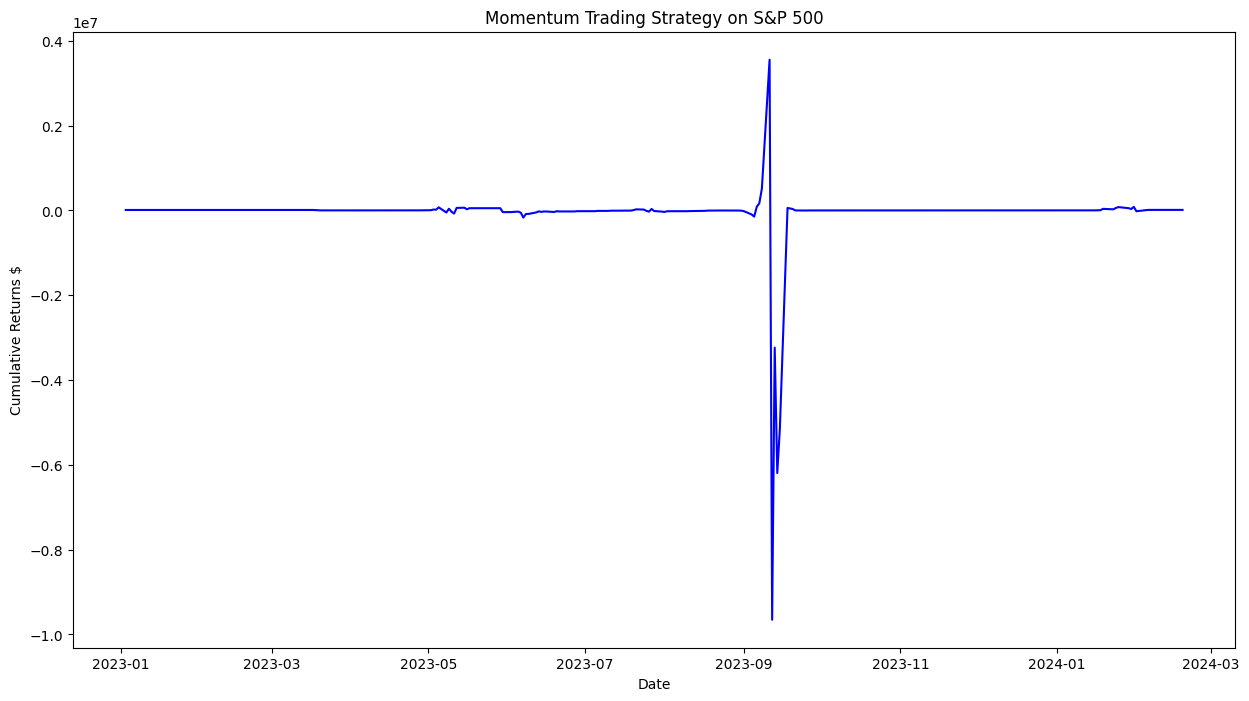

In [15]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Download historical data from Yahoo Finance
ticker = 'RVNL.NS'
data = yf.download(ticker, start='2023-01-01', end='2024-02-20')

# Calculate the 10-day and 50-day rate of change (ROC)
data['10d_roc'] = data['Close'].pct_change(periods=10)
data['50d_roc'] = data['Close'].pct_change(periods=50)

# Create a new column called "position" that signals buy/sell orders based on the momentum
data['position'] = 0
data.loc[(data['10d_roc'] > 0) & (data['50d_roc'] > 0), 'position'] = 1
data.loc[(data['10d_roc'] < 0) & (data['50d_roc'] < 0), 'position'] = -1

# Set up initial capital and position size
capital = 10000
position_size = capital / len(data)

# Calculate daily returns
data['daily_returns'] = data['Close'].pct_change()

# Calculate strategy returns
data['strategy_returns'] = data['position'].shift(1) * data['daily_returns'] * position_size

# Calculate cumulative returns
data['cumulative_returns'] = (1 + data['strategy_returns']).cumprod() * capital

# Plot cumulative returns
plt.figure(figsize=(15,8))
plt.plot(data['cumulative_returns'], 'b')
plt.title('Momentum Trading Strategy on S&P 500')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns $')
plt.show()

## Support and Resistance Trading:
This strategy involves buying at support levels and selling at resistance levels. Traders can use price action or technical indicators to identify support and resistance levels.

In [17]:
!pip install --upgrade mplfinance

[*********************100%%**********************]  1 of 1 completed
/tmp/ipykernel_38682/2381488002.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


[(Timestamp('2023-10-17 00:00:00'), 1555.75), (Timestamp('2023-10-26 00:00:00'), 1460.25), (Timestamp('2023-12-13 00:00:00'), 1615.0999755859375), (Timestamp('2023-12-28 00:00:00'), 1721.4000244140625), (Timestamp('2024-01-16 00:00:00'), 1683.6500244140625), (Timestamp('2024-01-24 00:00:00'), 1380.25)]


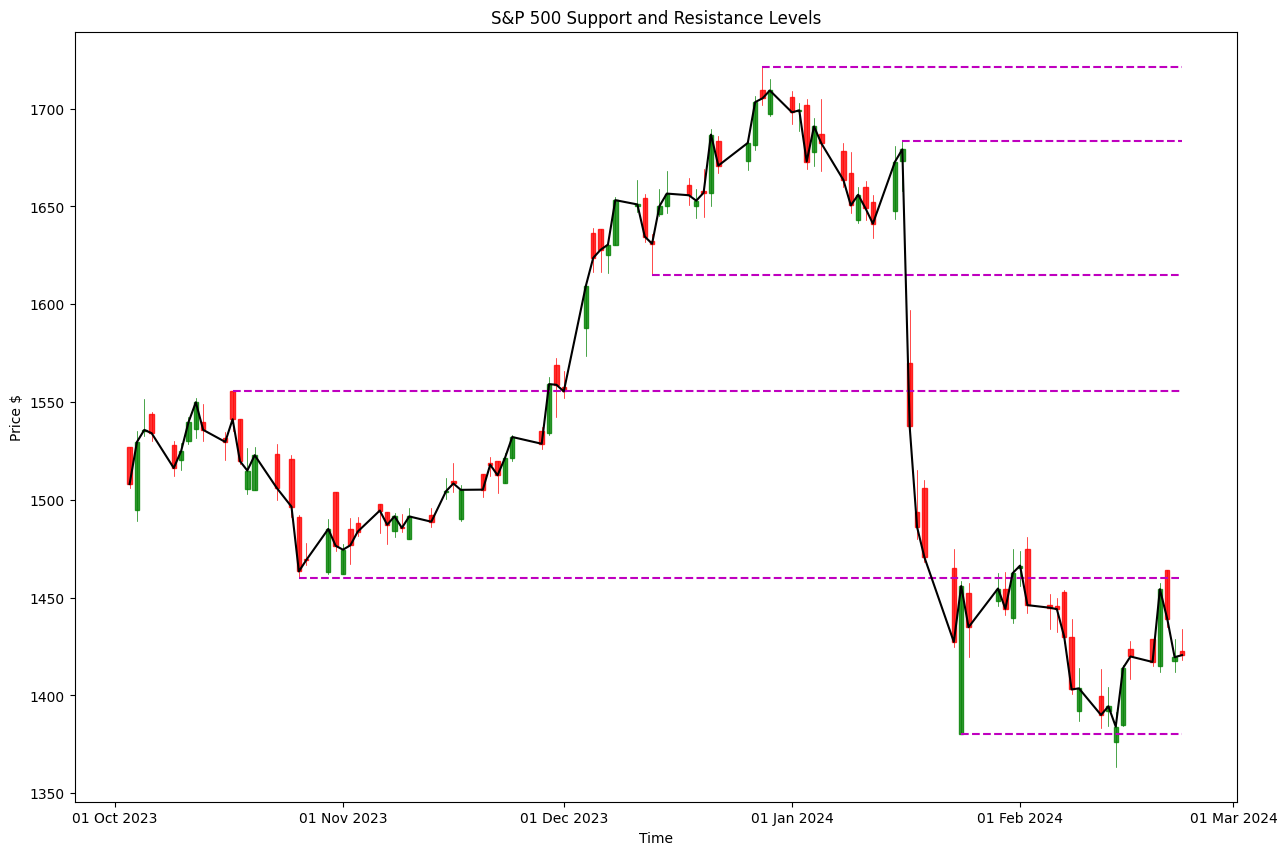

In [22]:
# Support and Reistance Levels 8

import pandas as pd
import yfinance as yf
import numpy as np
import math
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt


def get_stock_data(stock_symbol):
  data = yf.download(stock_symbol, start='2023-10-01', threads= False)
  data['Date'] = pd.to_datetime(data.index)
  data['Date'] = data['Date'].apply(mpl_dates.date2num)
  data = data.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]
  return data


def is_far_from_level(value, levels, data):    
  ave =  np.mean(data['High'] - data['Low'])    
  return np.sum([abs(value-level)<ave for _,level in levels])==0

def plot_all(levels, data):    
  fig, ax = plt.subplots(figsize=(15, 10))   
  candlestick_ohlc(ax,data.values,width=0.6, colorup='green', colordown='red', alpha=0.8)    
  date_format = mpl_dates.DateFormatter('%d %b %Y')
  
  ax.xaxis.set_major_formatter(date_format)    
  for level in levels:        
    plt.hlines(level[1], xmin = data['Date'][level[0]], xmax = max(data['Date']), colors='m', linestyle='--')
  plt.plot(data['Close'], 'k')
  plt.ylabel('Price $') 
  plt.xlabel('Time') 
  plt.title("S&P 500 Support and Resistance Levels")    
  fig.show()

stock_symbol = 'HDFCBANK.NS'
data = get_stock_data(stock_symbol)

pivot_levels = []
maxi_list = []
mini_list = []
for i in range(5, len(data)-5):
  # taking a window of 9 candles
  high_range = data['High'][i-5:i+4]
  current_maxi = high_range.max()
  # if we find a new maximum value, empty the maxi_list 
  if current_maxi not in maxi_list:
    maxi_list = []
  maxi_list.append(current_maxi)
  # if the maximum value remains the same after shifting 5 times
  if len(maxi_list)==5 and is_far_from_level(current_maxi,pivot_levels,data):
      pivot_levels.append((high_range.idxmax(), current_maxi))
    
  low_range = data['Low'][i-5:i+5]
  current_mini = low_range.min()
  if current_mini not in mini_list:
    mini_list = []
  mini_list.append(current_mini)
  if len(mini_list)==5 and is_far_from_level(current_mini,pivot_levels,data):
    pivot_levels.append((low_range.idxmin(), current_mini))
print(pivot_levels)
plot_all(pivot_levels, data)


## 1. Bollinger Bands Trading:
This strategy involves using Bollinger Bands to identify potential entry and exit points. Traders can buy when the price touches the lower Bollinger Band and sell when it touches the upper Bollinger Band.

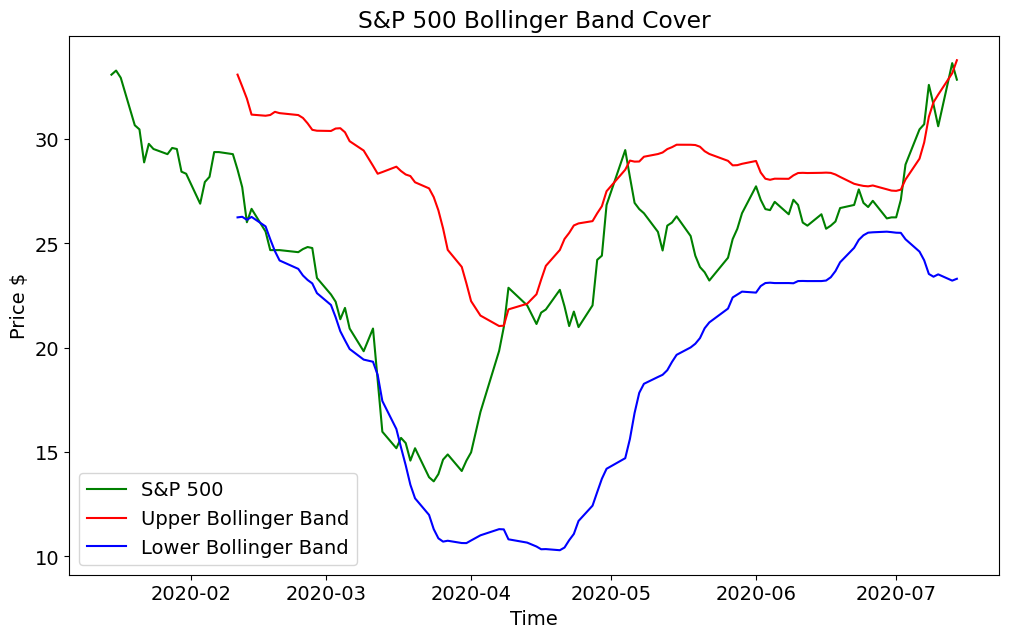

In [24]:
# Bollinger Band 9

import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import ta

ticker = yf.Ticker('FCL.NS')
df = ticker.history(interval="1d",start="2020-01-15",end="2020-07-15")

period = 20
multiplier = 2
df['UpperBand'] = df['Close'].rolling(period).mean() + df['Close'].rolling(period).std() * multiplier
df['LowerBand'] = df['Close'].rolling(period).mean() - df['Close'].rolling(period).std() * multiplier

plt.rcParams['figure.figsize'] = [12, 7]

plt.rc('font', size=14)

plt.plot(df['Close'], 'g', label = "S&P 500")
plt.plot(df['UpperBand'], 'r' , label = "Upper Bollinger Band")
plt.plot(df['LowerBand'], 'b', label = "Lower Bollinger Band")
plt.ylabel('Price $') 
plt.xlabel('Time') 
plt.title("S&P 500 Bollinger Band Cover")    

plt.legend()

plt.show()


## Here are some scenarios when Bollinger Bands trading strategy may be best for swing trading:

1. Range-bound markets: Bollinger Bands trading strategy works best in range-bound markets where the price is moving within a certain range. In such markets, the upper and lower bands of the Bollinger Bands can act as support and resistance levels, providing trading opportunities when the price bounces off these levels.
2. Shorter-term swing trades: Since Bollinger Bands trading strategy involves using shorter-term timeframes, it can be more suitable for shorter-term swing trades. This strategy can help traders capture the short to medium-term trend of a security, providing a quicker potential profit.
3. High volatility markets: Bollinger Bands trading strategy can be more effective in high volatility markets since the bands adjust to market volatility, providing a more accurate representation of the price action. This can lead to more reliable trading signals and potentially higher profits.
4. Trending markets: Bollinger Bands trading strategy can also work in trending markets, especially when the price is moving in a sideways direction within the trend. In such cases, the upper and lower bands can act as support and resistance levels, providing trading opportunities when the price bounces off these levels.
